In [25]:
import pandas as pd
import numpy as np
import matplotlib

## Reading data

In [26]:
data = pd.read_csv("Group1.xlsx - Group1.csv")
data

,S1,S2,S3
0,450,366,382
1,435,372,389
2,441,368,378
3,448,371,381
4,442,371,372
...,...,...,...
130,419,249,272
131,379,252,255
132,388,338,258
133,392,238,208


## Compute the covariance 

In [27]:
covariance = data.cov()
covariance

,S1,S2,S3
S1,403.333112,501.950304,512.664400
S2,501.950304,3528.406081,2911.589497
S3,512.664400,2911.589497,3778.218684


## Compute the correlation coefficients

In [28]:
correlation = data.corr(method="pearson")
correlation

,S1,S2,S3
S1,1.000000,0.420765,0.415296
S2,0.420765,1.000000,0.797439
S3,0.415296,0.797439,1.000000


## Plot and report the relationships between the variables

<Axes: >

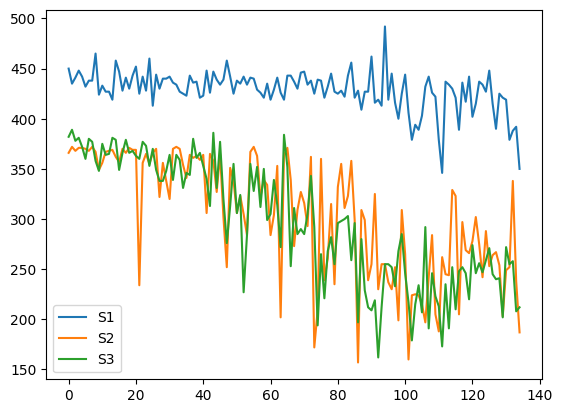

In [29]:
data.plot()

## Generate a random sample of 50 observations for each sensor


In [30]:
import random
sample_data = data.sample(n=50)
sample_data

,S1,S2,S3
74,439,209,194
59,435,334,299
30,442,320,364
99,425,309,285
52,442,305,227
88,427,299,229
98,400,199,268
120,402,278,274
67,437,273,311
14,458,362,379


## Compute the upper and the lower bounds with confidence intervals 90%, 95%, 99% 

In [31]:
statistics = data.describe(include='all').loc[['mean', 'std'], :]
statistics

,S1,S2,S3
mean,428.651852,304.837037,296.681481
std,20.083155,59.400388,61.467216


In [42]:
mean = data.mean()
std = data.std()

# Compute the number of data points and degrees of freedom for each column
n = data.count()
df = n - 1

# Set the confidence levels
conf_levels = [0.90, 0.95, 0.99]

# Compute the t-values for the confidence levels and degrees of freedom
t_values = [abs(np.random.standard_t(df[i])) for i in range(len(df)) for conf_level in conf_levels]

# Reshape t-values to match the shape of mean and std
t_values = np.array(t_values).reshape(len(mean), len(conf_levels))

# Compute the confidence intervals for each column and confidence level
conf_ints = []
for i in range(len(mean)):
    row = []
    for j in range(len(conf_levels)):
        row.append((mean[i] - t_values[i][j] * std[i] / np.sqrt(n[i]), mean[i] + t_values[i][j] * std[i] / np.sqrt(n[i])))
    conf_ints.append(row)

# Print the results
for i, col in enumerate(data.columns):
    print(f"{col}:")
    for j, conf_level in enumerate(conf_levels):
        print(f"{conf_level:.0%} confidence interval: ({conf_ints[i][j][0]:.2f}, {conf_ints[i][j][1]:.2f})")
    print()

S1:
90% confidence interval: (427.11, 430.19)
95% confidence interval: (425.57, 431.73)
99% confidence interval: (426.00, 431.30)

S2:
90% confidence interval: (303.52, 306.15)
95% confidence interval: (303.56, 306.11)
99% confidence interval: (303.02, 306.66)

S3:
90% confidence interval: (289.16, 304.20)
95% confidence interval: (295.09, 298.27)
99% confidence interval: (296.15, 297.21)

